# Machine Learning a Ramsey Plan

## Introduction

This  lecture  uses what we call a ``machine learning`` approach to 
compute a Ramsey plan  for  a version of a model of Calvo {cite}`Calvo1978`. 

We use another approach to compute a  Ramsey plan for Calvo's model  in another quantecon lecture
{doc}`calvo`.  

The {doc}`calvo` lecture  uses  an analytic approach based on ``dynamic programming squared`` to guide computations.


Dynamic programming squared provides  information about the structure of  mathematical  objects in terms of which a Ramsey plan can be represented recursively.

Using that information  paves the way to computing a  Ramsey plan efficiently.  

Included in the structural information  that dynamic programming squared provides  in quantecon lecture {doc}`calvo`  are 

  * a **state** variable that confronts a continuation Ramsey planner, and 
  * two **Bellman equations**
    * one that describes the behavior of the representative agent
    * another that describes  decision problems of a Ramsey planner and of a continuation Ramsey planner  


In this lecture, we approach the Ramsey planner in a less sophisticated way that proceeds without knowing the mathematical  structure imparted by dynamic programming squared.

We simply choose a pair of infinite sequences of real numbers that maximizes a Ramsey planner's objective function.

The pair  consists of 

* a sequence $\vec \theta$ of inflation rates 
* a sequence $\vec \mu$ of money growh rates

Because it fails to take advantage of the structure recognized by dynamic programming squared and, relative to the dynamic programming squared approach, proliferates parameters, we take the liberty of calling this a **machine learning** approach.

This is similar to what other machine learning algorithms also do.  

Comparing the calculations in this lecture with those in our sister lecture {doc}`calvo` provides us
with a laboratory that can  help us  appreciate promises and limits of machine learning approaches
more generally. 

In this lecture, we'll actually deploy two machine learning approaches. 

 * the first is really lazy 
    * it  writes  a Python function that   computes the Ramsey planner's objective as a function of a money growth rate sequence and  hands it over to a ``gradient descent`` optimizer
 * the second is less lazy
     * it exerts enough  mental effort required to express the Ramsey planner's objective as an affine quadratic form in $\vec \mu$, computes first-order conditions for an optimum, arranges them into a system of simultaneous linear  equations for $\vec \mu$ and then $\vec \theta$, then solves them.

Each of  these machine learning (ML) approaches  recovers the same  Ramsey plan that we compute  in  quantecon lecture {doc}`calvo` by using dynamic programming squared.

However,   the recursive structure of the Ramsey plan lies hidden within   some of the objects calculated  by our ML approaches.

To  ferret out that structure, we have to ask   the right questions.

 
We pose  some of  those questions at the end of this lecture and  answer them  by running  some  linear  regressions on components of $\vec \mu, \vec \theta,$ and another vector that we'll define later.   

Human intelligence, not the ``artificial intelligence`` deployed in our machine learning approach, is a key input into choosing which regressions to run. 
 

## The Model

We study a   linear-quadratic version of a model that Guillermo Calvo {cite}`Calvo1978` used to illustrate the **time inconsistency** of optimal government plans.


Calvo's model focuses  on intertemporal tradeoffs between

- utility accruing from  a representative  agent's anticipations of future  deflation that lower the agent's  cost of holding real money balances and prompt him to  increase his   *liquidity*, as  measured by his   stock  of real money balances, and
- social costs associated with the  distorting taxes that a government  levies  to acquire the paper money that it   destroys  in order to generate prospective deflation

The model features

- rational expectations
- costly government actions at all dates $t \geq 1$ that increase the representative agent's  utilities at dates before $t$


The model combines ideas from  papers by Cagan {cite}`Cagan`, {cite}`sargent1973stability`,  and  Calvo {cite}`Calvo1978`.




## Model Components

There is no uncertainty.

Let:

- $p_t$ be the log of the price level
- $m_t$ be the log of nominal money balances
- $\theta_t = p_{t+1} - p_t$ be the net rate of inflation between $t$ and $t+1$
- $\mu_t = m_{t+1} - m_t$ be the net rate of growth of nominal balances

The demand for real balances is governed by a perfect foresight
version of a Cagan {cite}`Cagan` demand function for real balances:

```{math}
:label: eq_grad_old1

m_t - p_t = -\alpha(p_{t+1} - p_t) \: , \: \alpha > 0
```

for $t \geq 0$.

Equation {eq}`eq_grad_old1` asserts that the representative agent's demand for real balances is inversely
related to the representative agent's expected rate of inflation, which  equals
the actual rate of inflation because there is no uncertainty here.

(When there is no uncertainty, an assumption of **rational expectations**  becomes equivalent to  **perfect foresight**).


Subtracting the demand function {eq}`eq_grad_old1` at time $t$ from the demand
function at $t+1$ gives:

$$
\mu_t - \theta_t = -\alpha \theta_{t+1} + \alpha \theta_t
$$

or

```{math}
:label: eq_grad_old2

\theta_t = \frac{\alpha}{1+\alpha} \theta_{t+1} + \frac{1}{1+\alpha} \mu_t
```

Because $\alpha > 0$,  $0 < \frac{\alpha}{1+\alpha} < 1$.

```{prf:definition}
:label: square-summable

For  scalar $b_t$, let $L^2$ be the space of sequences
$\{b_t\}_{t=0}^\infty$ that satisfy 

$$
\sum_{t=0}^\infty  b_t^2 < +\infty
$$

We say that a sequence that belongs to $L^2$ is **square summable**.
```

When we assume that the sequence $\vec \mu = \{\mu_t\}_{t=0}^\infty$ is square summable and also require that the sequence $\vec \theta = \{\theta_t\}_{t=0}^\infty$ is square summable,
the linear difference equation {eq}`eq_grad_old2` can be solved forward to get:

```{math}
:label: eq_grad_old3

\theta_t = \frac{1}{1+\alpha} \sum_{j=0}^\infty \left(\frac{\alpha}{1+\alpha}\right)^j \mu_{t+j}, \quad t \geq 0
```






The  government  values  a representative household's utility of real balances at time $t$ according to the utility function

```{math}
:label: eq_grad_old5

U(m_t - p_t) = u_0 + u_1 (m_t - p_t) - \frac{u_2}{2} (m_t - p_t)^2, \quad u_0 > 0, u_1 > 0, u_2 > 0
```

The money demand function {eq}`eq_grad_old1` and the utility function {eq}`eq_grad_old5` imply that 

$$
U(-\alpha \theta_t) = u_0 + u_1 (-\alpha \theta_t) -\frac{u_2}{2}(-\alpha \theta_t)^2 . 
$$ (eq_grad_old5a)


```{note}
The "bliss level" of real balances is  $\frac{u_1}{u_2}$;  the inflation rate that attains
it is $-\frac{u_1}{u_2 \alpha}$.
```

Via equation {eq}`eq_grad_old3`, a government plan
$\vec \mu = \{\mu_t \}_{t=0}^\infty$ leads to a
sequence of inflation rates
$\vec \theta = \{ \theta_t \}_{t=0}^\infty$.

We assume that the government incurs  social costs $\frac{c}{2} \mu_t^2$ when it  changes the stock of nominal money
balances at rate $\mu_t$  at time $t$.

Therefore, the one-period welfare function of a benevolent government
is


$$
s(\theta_t,\mu_t) = U(-\alpha \theta_t) - \frac{c}{2} \mu_t^2  .
$$

The Ramsey planner's criterion is 

$$
V = \sum_{t=0}^\infty \beta^t s(\theta_t, \mu_t) 
$$ (eq:RamseyV)

where $\beta \in (0,1)$ is a discount factor.  

The Ramsey planner chooses 
 a vector of money growth rates $\vec \mu$ 
to maximize criterion {eq}`eq:RamseyV` subject to equations {eq}`eq_grad_old3` and that  restriction

$$ 
\vec \theta \in L^2 
$$ (eq:thetainL2)

Equations {eq}`eq_grad_old3` and {eq}`eq:thetainL2` imply that $\vec \theta$ is a function 
of $\vec \mu$.  

In particular, the inflation rate $\theta_t$ satisfies

$$
\theta_t = (1-\lambda) \sum_{j=0}^\infty \lambda^j \mu_{t+j}, \quad t \geq 0
$$ (eq:inflation101)

where 

$$
\lambda = \frac{\alpha}{1+\alpha} .
$$







## Parameters and Variables


**Parameters:**  

* Demand for money parameter is $\alpha > 0$; we set its default value $\alpha = 1$

   * Induced demand function for money parameter is  $\lambda = \frac{\alpha}{1+\alpha}$

 * Utility function parameters are   $u_0, u_1, u_2 $ and $\beta \in (0,1)$

 * Cost parameter of tax distortions associated with setting $\mu_t \neq 0$ is $c$
 
 * A horizon truncation parameter: a positive integer $T >0$

  


**Variables:** 

 * $\theta_t = p_{t+1} - p_t$ where $p_t$ is log of price level
 
 * $\mu_t = m_{t+1} - m_t $ where $m_t$ is log of money supply



### Basic Objects

To prepare the way for our calculations, we'll remind ourselves of the  mathematical objects
in play.

* sequences of inflation rates and money creation rates:

$$
(\vec \theta, \vec \mu) = \{\theta_t, \mu_t\}_{t=0}^\infty
$$ 

* A planner's value function

$$
V = \sum_{t=0}^\infty \beta^t (h_0 + h_1 \theta_t + h_2 \theta_t^2 -
\frac{c}{2} \mu_t^2 )
$$ (eq:Ramseyvalue)

where we set  $h_0, h_1, h_2$  to match 

$$
u_0 + u_1(-\alpha \theta_t) - \frac{u_2}{2} (-\alpha \theta_t)^2
$$

with 

$$
h_0 + h_1 \theta_t + h_2 \theta_t^2 
$$

To make our parameters  match as we want, we   set

$$
\begin{aligned}
h_0 & = u_0 \cr
h_1 & = -\alpha u_1 \cr
h_2 & = - \frac{u_2 \alpha^2}{2}
\end{aligned}
$$


A Ramsey planner chooses $\vec \mu$ to maximize the government's value function {eq}`eq:Ramseyvalue`
subject to equations  {eq}`eq:inflation101`.

A  solution $\vec \mu$ of this problem is called a **Ramsey plan**.  


### Timing protocol

Following Calvo {cite}`Calvo1978`, we assume that the  government chooses the money growth  sequence $\vec \mu$ once and for all at, or before, time $0$.  

An optimal  government plan under this timing protocol is an example of what is  often called a **Ramsey plan**.

Notice that while the government is in effect choosing a bivariate **time series** $(\vec mu, \vec \theta)$, the government's problem is **static** in the sense that it chooses treats that time-series as a single object to be chosen at a single point in time. 


## Approximation and Truncation parameter $T$

We anticipate that under a Ramsey plan the sequences  $\{\theta_t\}$ and $\{\mu_t\}$  both converge to stationary values. 

Thus, we guess that 
 under the optimal policy
$ \lim_{t \rightarrow + \infty} \mu_t = \bar \mu$.

Convergence of $\mu_t$ to $\bar \mu$ together with formula {eq}`eq:inflation101` for the inflation rate then implies that  $ \lim_{t \rightarrow + \infty} \theta_t = \bar \mu$ as well.

We'll  guess a time $T$ large enough that $\mu_t$ has gotten 
very close to the limit $\bar \mu$.

Then we'll approximate $\vec \mu$ by a truncated  vector
with the property that 

$$
\mu_t = \bar \mu \quad \forall t \geq T
$$

We'll approximate $\vec \theta$ with a truncated vector with the property that 

$$
\theta_t = \bar \theta \quad \forall t \geq T
$$

**Formula for truncated $\vec \theta$**

In light of our approximation that $\mu_t = \bar \mu$ for all $t \geq T$, we  seek a  function that takes 

$$
\tilde \mu = \begin{bmatrix}\mu_0 & \mu_1 & \cdots & \mu_{T-1} & \bar \mu
\end{bmatrix}
$$

as an input and  as an output gives


$$
\tilde \theta = \begin{bmatrix}\theta_0 & \theta_1 & \cdots & \theta_{T-1} & \bar \theta
\end{bmatrix}
$$

where   $\bar \theta = \bar \mu$ and $\theta_t$ satisfies

$$
\theta_t = (1-\lambda) \sum_{j=0}^{T-1-t} \lambda^j \mu_{t+j} + \lambda^{T-t} \bar \mu 
$$ (eq:thetaformula102)

for $t=0, 1, \ldots, T-1$.

**Formula  for $V$**

Having specified a  truncated vector $\tilde \mu$ and and having computed  $\tilde \theta$
by using formula {eq}`eq:thetaformula102`, we shall   write a Python  function that computes

$$
\tilde V = \sum_{t=0}^\infty \beta^t (
h_0 + h_1 \tilde\theta_t + h_2 \tilde\theta_t^2 -
\frac{c}{2} \mu_t^2 )
$$ (eq:valueformula101)

or more precisely 

$$ 
\tilde V = \sum_{t=0}^{T-1} \beta^t (h_0 + h_1 \tilde\theta_t + h_2 \tilde\theta_t^2 -
\frac{c}{2} \mu_t^2 ) + \frac{\beta^T}{1-\beta} (h_0 + h_1 \bar \mu + h_2 \bar \mu^2 - \frac{c}{2} \bar \mu^2 )
$$

where $\tilde \theta_t, \ t = 0, 1, \ldots , T-1$ satisfies formula (1).

## A Gradient Descent Algorithm

We now describe  code that  maximizes the criterion function {eq}`eq:Ramseyvalue` subject to equations {eq}`eq:inflation101` by choice of the truncated vector  $\tilde \mu$.

We use a brute force or ``machine learning`` approach that just hands our problem off to code that minimizes $V$ with respect to the components of $\tilde \mu$ by using gradient descent. 

We hope that answers will agree with those found obtained by other more structured methods in this quantecon lecture {doc}`calvo`.

### Implementation

We will implement the above in Python using JAX and Optax libraries.

We use the following imports in this lecture

In [1]:
!pip install --upgrade quantecon
!pip install --upgrade optax
!pip install --upgrade statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.7 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 169.7 MB/s eta 0:00:00


  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2


    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2


In [2]:
from quantecon import LQ
import numpy as np
import jax.numpy as jnp
from jax import jit, grad
import optax
import statsmodels.api as sm
import matplotlib.pyplot as plt

We'll eventually  want to compare the results we obtain  here to those that we obtain in  those obtained in this quantecon lecture {doc}`calvo`.  

To enable us to do that, we  copy the class `ChangLQ`  used in that lecture.


We hide the cell that copies the class, but readers can find details of the class in this quantecon lecture {doc}`calvo`.

In [3]:
class ChangLQ:
    """
    Class to solve LQ Chang model
    """
    def __init__(self, β, c, α=1, u0=1, u1=0.5, u2=3, T=1000, θ_n=200):
        # Record parameters
        self.α, self.u0, self.u1, self.u2 = α, u0, u1, u2
        self.β, self.c, self.T, self.θ_n = β, c, T, θ_n

        self.setup_LQ_matrices()
        self.solve_LQ_problem()
        self.compute_policy_functions()
        self.simulate_ramsey_plan()
        self.compute_θ_range()
        self.compute_value_and_policy()

    def setup_LQ_matrices(self):
        # LQ Matrices
        self.R = -np.array([[self.u0, -self.u1 * self.α / 2],
                            [-self.u1 * self.α / 2, 
                             -self.u2 * self.α**2 / 2]])
        self.Q = -np.array([[-self.c / 2]])
        self.A = np.array([[1, 0], [0, (1 + self.α) / self.α]])
        self.B = np.array([[0], [-1 / self.α]])

    def solve_LQ_problem(self):
        # Solve LQ Problem (Subproblem 1)
        lq = LQ(self.Q, self.R, self.A, self.B, beta=self.β)
        self.P, self.F, self.d = lq.stationary_values()

        # Compute g0, g1, and g2 (41.16)
        self.g0, self.g1, self.g2 = [-self.P[0, 0], 
                                     -2 * self.P[1, 0], -self.P[1, 1]]
        
        # Compute b0 and b1 (41.17)
        [[self.b0, self.b1]] = self.F

        # Compute d0 and d1 (41.18)
        self.cl_mat = (self.A - self.B @ self.F)  # Closed loop matrix
        [[self.d0, self.d1]] = self.cl_mat[1:]

        # Solve Subproblem 2
        self.θ_R = -self.P[0, 1] / self.P[1, 1]
        
        # Find the bliss level of θ
        self.θ_B = -self.u1 / (self.u2 * self.α)

    def compute_policy_functions(self):
        # Solve the Markov Perfect Equilibrium
        self.μ_MPE = -self.u1 / ((1 + self.α) / self.α * self.c 
                                 + self.α / (1 + self.α)
                                 * self.u2 + self.α**2 
                                 / (1 + self.α) * self.u2)
        self.θ_MPE = self.μ_MPE
        self.μ_CR = -self.α * self.u1 / (self.u2 * self.α**2 + self.c)
        self.θ_CR = self.μ_CR

        # Calculate value under MPE and CR economy
        self.J_θ = lambda θ_array: - np.array([1, θ_array]) \
                                   @ self.P @ np.array([1, θ_array]).T
        self.V_θ = lambda θ: (self.u0 + self.u1 * (-self.α * θ)
                              - self.u2 / 2 * (-self.α * θ)**2 
                              - self.c / 2 * θ**2) / (1 - self.β)
        
        self.J_MPE = self.V_θ(self.μ_MPE)
        self.J_CR = self.V_θ(self.μ_CR)

    def simulate_ramsey_plan(self):
        # Simulate Ramsey plan for large number of periods
        θ_series = np.vstack((np.ones((1, self.T)), np.zeros((1, self.T))))
        μ_series = np.zeros(self.T)
        J_series = np.zeros(self.T)
        θ_series[1, 0] = self.θ_R
        [μ_series[0]] = -self.F.dot(θ_series[:, 0])
        J_series[0] = self.J_θ(θ_series[1, 0])

        for i in range(1, self.T):
            θ_series[:, i] = self.cl_mat @ θ_series[:, i-1]
            [μ_series[i]] = -self.F @ θ_series[:, i]
            J_series[i] = self.J_θ(θ_series[1, i])

        self.J_series = J_series
        self.μ_series = μ_series
        self.θ_series = θ_series

    def compute_θ_range(self):
        # Find the range of θ in Ramsey plan
        θ_LB = min(min(self.θ_series[1, :]), self.θ_B)
        θ_UB = max(max(self.θ_series[1, :]), self.θ_MPE)
        θ_range = θ_UB - θ_LB
        self.θ_LB = θ_LB - 0.05 * θ_range
        self.θ_UB = θ_UB + 0.05 * θ_range
        self.θ_range = θ_range

    def compute_value_and_policy(self):        
        # Create the θ_space
        self.θ_space = np.linspace(self.θ_LB, self.θ_UB, 200)
        
        # Find value function and policy functions over range of θ
        self.J_space = np.array([self.J_θ(θ) for θ in self.θ_space])
        self.μ_space = -self.F @ np.vstack((np.ones(200), self.θ_space))
        x_prime = self.cl_mat @ np.vstack((np.ones(200), self.θ_space))
        self.θ_prime = x_prime[1, :]
        self.CR_space = np.array([self.V_θ(θ) for θ in self.θ_space])
        
        self.μ_space = self.μ_space[0, :]
        
        # Calculate J_range, J_LB, and J_UB
        self.J_range = np.ptp(self.J_space)
        self.J_LB = np.min(self.J_space) - 0.05 * self.J_range
        self.J_UB = np.max(self.J_space) + 0.05 * self.J_range

Now we compute the value of $V$ under this setup, and compare it against those obtained in this section {ref}`compute_lq` of the sister quantecon lecture {doc}`calvo`.

In [4]:
# Assume β=0.85, c=2, T=40.
T = 40
clq = ChangLQ(β=0.85, c=2, T=T)

In [5]:
@jit
def compute_θ(μ, α=1):
    λ = α / (1 + α)
    T = len(μ) - 1
    μbar = μ[-1]
    
    # Create an array of powers for λ
    λ_powers = λ ** jnp.arange(T + 1)
    
    # Compute the weighted sums for all t
    weighted_sums = jnp.array(
        [jnp.sum(λ_powers[:T-t] * μ[t:T]) for t in range(T)])
    
    # Compute θ values except for the last element
    θ = (1 - λ) * weighted_sums + λ**(T - jnp.arange(T)) * μbar
    
    # Set the last element
    θ = jnp.append(θ, μbar)
    
    return θ

@jit
def compute_hs(u0, u1, u2, α):
    h0 = u0
    h1 = -u1 * α
    h2 = -0.5 * u2 * α**2
    
    return h0, h1, h2
    
@jit
def compute_V(μ, β, c, α=1, u0=1, u1=0.5, u2=3):
    θ = compute_θ(μ, α)
    
    h0, h1, h2 = compute_hs(u0, u1, u2, α)
    
    T = len(μ) - 1
    t = np.arange(T)
    
    # Compute sum except for the last element
    V_sum = np.sum(β**t * (h0 + h1 * θ[:T] + h2 * θ[:T]**2 - 0.5 * c * μ[:T]**2))
    
    # Compute the final term
    V_final = (β**T / (1 - β)) * (h0 + h1 * μ[-1] + h2 * μ[-1]**2 - 0.5 * c * μ[-1]**2)
    
    V = V_sum + V_final
    
    return V

In [6]:
V_val = compute_V(clq.μ_series, β=0.85, c=2)

# Check the result with the ChangLQ class in previous lecture
print(f'deviation = {np.abs(V_val - clq.J_series[0])}') # good!

deviation = 1.430511474609375e-06


Now we want to maximize the function $V$ by choice of $\mu$.

We will use the [`optax.adam`](https://optax.readthedocs.io/en/latest/api/optimizers.html#optax.adam) from the `optax` library.

In [7]:
def adam_optimizer(grad_func, init_params, 
                   lr=0.1, 
                   max_iter=10_000, 
                   error_tol=1e-7):

    # Set initial parameters and optimizer
    params = init_params
    optimizer = optax.adam(learning_rate=lr)
    opt_state = optimizer.init(params)

    # Update parameters and gradients
    @jit
    def update(params, opt_state):
        grads = grad_func(params)
        updates, opt_state = optimizer.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        return params, opt_state, grads

    # Gradient descent loop
    for i in range(max_iter):
        params, opt_state, grads = update(params, opt_state)
        
        if jnp.linalg.norm(grads) < error_tol:
            print(f"Converged after {i} iterations.")
            break

        if i % 100 == 0: 
            print(f"Iteration {i}, grad norm: {jnp.linalg.norm(grads)}")
    
    return params

Here we use automatic differentiation functionality in JAX with `grad`.

In [8]:
# Initial guess for μ
μ_init = jnp.zeros(T)

# Maximization instead of minimization
grad_V = jit(grad(
    lambda μ: -compute_V(μ, β=0.85, c=2)))

In [9]:
%%time

# Optimize μ
optimized_μ = adam_optimizer(grad_V, μ_init)

print(f"optimized μ = \n{optimized_μ}")

Iteration 0, grad norm: 0.8627105951309204
Iteration 100, grad norm: 0.0033030747435986996
Iteration 200, grad norm: 1.7024205590132624e-05
Converged after 280 iterations.
optimized μ = 
[-0.06450712 -0.09033986 -0.10068493 -0.10482776 -0.1064868  -0.10715118
 -0.10741721 -0.10752378 -0.10756644 -0.10758355 -0.10759039 -0.10759313
 -0.10759424 -0.10759468 -0.10759487 -0.10759494 -0.10759497 -0.10759496
 -0.10759497 -0.10759497 -0.10759497 -0.10759496 -0.10759497 -0.10759498
 -0.10759497 -0.10759499 -0.10759498 -0.10759495 -0.10759496 -0.10759495
 -0.10759493 -0.10759493 -0.10759492 -0.10759495 -0.10759494 -0.10759496
 -0.10759497 -0.10759499 -0.10759497 -0.10759499]
CPU times: user 873 ms, sys: 143 ms, total: 1.02 s
Wall time: 1.06 s


In [10]:
print(f"original μ = \n{clq.μ_series}")

original μ = 
[-0.06450708 -0.09033982 -0.10068489 -0.10482772 -0.10648677 -0.10715115
 -0.10741722 -0.10752377 -0.10756644 -0.10758352 -0.10759037 -0.10759311
 -0.1075942  -0.10759464 -0.10759482 -0.10759489 -0.10759492 -0.10759493
 -0.10759493 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494
 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494
 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494
 -0.10759494 -0.10759494 -0.10759494 -0.10759494]


In [11]:
print(f'deviation = {np.linalg.norm(optimized_μ - clq.μ_series)}')

deviation = 2.1230886204648414e-07


In [12]:
compute_V(optimized_μ, β=0.85, c=2)

Array(6.835783, dtype=float32)

In [13]:
compute_V(clq.μ_series, β=0.85, c=2)

Array(6.835783, dtype=float32)

 

### Restricting  $\mu_t = \bar \mu$ for all $t$

We take  a brief detour to solve a restricted version of  the Ramsey problem defined above.

First, recall that a Ramsey planner chooses $\vec \mu$ to maximize the government's value function {eq}`eq:Ramseyvalue` subject to equations  {eq}`eq:inflation101`.

We now define a distinct problem in which the planner chooses $\vec \mu$ to maximize the government's value function {eq}`eq:Ramseyvalue` subject to equation  {eq}`eq:inflation101` and
the additional restriction that  $\mu_t = \bar \mu$ for all $t$.  

The solution of this problem is a time-invariant $\mu_t$ that this quantecon lecture  {doc}`calvo` calls $\mu^{CR}$.

In [14]:
# Initial guess for single μ
μ_init = jnp.zeros(1)

# Maximization instead of minimization
grad_V = jit(grad(
    lambda μ: -compute_V(μ, β=0.85, c=2)))

# Optimize μ
optimized_μ_CR = adam_optimizer(grad_V, μ_init)

print(f"optimized μ = \n{optimized_μ_CR}")

Iteration 0, grad norm: 3.333333969116211
Iteration 100, grad norm: 0.004978656768798828
Iteration 200, grad norm: 6.771087646484375e-05
Converged after 276 iterations.
optimized μ = 
[-0.10000006]


Comparing it to $\mu^{CR}$ in {doc}`calvo`, we again obtained very close answers.

In [15]:
np.linalg.norm(clq.μ_CR - optimized_μ_CR)

5.9604645e-08

In [16]:
V_CR = compute_V(optimized_μ_CR, β=0.85, c=2)
V_CR

Array(6.833335, dtype=float32)

In [17]:
compute_V(jnp.array([clq.μ_CR]), β=0.85, c=2)

Array(6.833334, dtype=float32)

## A More Structured ML Algorithm

By thinking  about the mathematical structure of the Ramsey problem and using some linear algebra, we can simplify the problem that we hand over to a ``machine learning`` algorithm. 

We start by recalling that  the Ramsey problem that chooses  $\vec \mu$ to maximize the government's value function {eq}`eq:Ramseyvalue`subject to equation  {eq}`eq:inflation101`.

This  turns out to be  an optimization  problem with a quadratic objective function and linear constraints.

First-order conditions for this problem are a set of simultaneous linear equations in $\vec \mu$.

If we trust that the second-order conditions for a maximum are also satisfied (they are in our problem),
we can compute the Ramsey plan by solving these equations for $\vec \mu$.

We'll apply this approach here and compare answers with what we obtained above with the gradient descent approach.

To remind us of the setting, remember that we have assumed that 


$$ 
\mu_t = \mu_T \;  \forall t \geq T
$$

and that

$$ 
\theta_t = \theta_T = \mu_T \ \forall t \geq T
$$


Again, define

$$
\vec \theta = \begin{bmatrix} \theta_0 \cr
           \theta_1 \cr
           \vdots \cr
           \theta_{T-1} \cr
           \theta_T \end{bmatrix} , \quad
\vec \mu = \begin{bmatrix} \mu_0 \cr
           \mu_1 \cr
           \vdots \cr
           \mu_{T-1} \cr
           \mu_T \end{bmatrix}
$$

Write the  system of $T+1$ equations {eq}`eq:thetaformula102`
that relate  $\vec \theta$ to a choice of $\vec \mu$   as the single matrix equation

$$
\frac{1}{(1 - \lambda)}
\begin{bmatrix} 1 & -\lambda & 0 & 0 & \cdots & 0 & 0 \cr
                0 & 1 & -\lambda & 0 & \cdots & 0 & 0 \cr
                0 & 0 & 1 & -\lambda & \cdots & 0 & 0 \cr
                \vdots & \vdots & \vdots & \vdots & \vdots & -\lambda & 0 \cr
                0 & 0 & 0 & 0 & \cdots & 1 & -\lambda \cr
                0 & 0 & 0 & 0 & \cdots & 0 & 1-\lambda \end{bmatrix}
\begin{bmatrix} \theta_0 \cr \theta_1 \cr \theta_2 \cr \vdots \cr \theta_{T-1} \cr \theta_T 
\end{bmatrix} 
= \begin{bmatrix} 
\mu_0 \cr \mu_1 \cr \mu_2 \cr \vdots \cr \mu_{T-1} \cr \mu_T
\end{bmatrix}
$$ 

or 

$$
A \vec \theta = \vec \mu
$$

or

$$
\vec \theta = B \vec \mu 
$$

where 

$$ 
B = A^{-1}
$$

In [18]:
def construct_B(α, T):
    λ = α / (1 + α)
    
    A = (jnp.eye(T, T) - λ*jnp.eye(T, T, k=1))/(1-λ)
    A = A.at[-1, -1].set(A[-1, -1]*(1-λ))

    B = jnp.linalg.inv(A)
    return A, B

In [19]:
A, B = construct_B(α=clq.α, T=T)

print(f'A = \n {A}')

A = 
 [[ 2. -1.  0. ...  0.  0.  0.]
 [ 0.  2. -1. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ...  0.  2. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [20]:
# Compute θ using optimized_μ
θs = np.array(compute_θ(optimized_μ))
μs = np.array(optimized_μ)

In [21]:
np.allclose(θs, B @ clq.μ_series)

True

As before, the Ramsey planner's criterion is


$$
V = \sum_{t=0}^\infty \beta^t (h_0 + h_1 \theta_t + h_2 \theta_t^2 -
\frac{c}{2} \mu_t^2 )
$$

With our assumption above, criterion $V$ can be rewritten as

$$
\begin{aligned}
V & = \sum_{t=0}^{T-1} \beta^t (h_0 + h_1 \theta_t + h_2 \theta_t^2 -
\frac{c}{2} \mu_t^2 ) \cr 
& + \frac{\beta^T}{1-\beta} (h_0 + h_1 \theta_T + h_2 \theta_T^2 -
\frac{c}{2} \mu_T^2 )
\end{aligned}
$$

To help us write $V$ as a quadratic plus affine form, define

$$
\vec{\beta} = \begin{bmatrix} 1 \\ 
              \beta \\ \vdots \\ 
              \beta^{T-1} \\ 
              \frac{\beta^T}{1-\beta} \end{bmatrix}
$$

Then we have:

$$
h_1 \sum_{t=0}^\infty \beta^t \theta_t = h_1 \cdot \vec{\beta}^T \vec{\theta} = (h_1 \cdot B^T \vec{\beta})^T \vec{\mu} = g^T \vec{\mu}
$$
where $g = h_1 \cdot B^T \vec{\beta}$ is a $(T+1) \times 1$ vector,

$$
h_2 \sum_{t=0}^\infty \beta^t \theta_t^2 = \vec{\mu}^T (B^T (h_2 \cdot \vec{\beta} \cdot \mathbf{I}) B) \vec{\mu} = \vec{\mu}^T M \vec{\mu}
$$
where $M = B^T (h_2 \cdot \vec{\beta} \cdot \mathbf{I}) B$ is a $(T+1) \times (T+1)$ matrix,

$$
\frac{c}{2} \sum_{t=0}^\infty \beta^t \mu_t^2 =  \vec{\mu}^T (\frac{c}{2} \cdot \vec{\beta} \cdot \mathbf{I}) \vec{\mu} = \vec{\mu}^T F \vec{\mu}
$$
where $F = \frac{c}{2} \cdot \vec{\beta} \cdot \mathbf{I}$ is a $(T+1) \times (T+1)$ matrix

It follows that

$$
\begin{aligned}
J = V - h_0 &= \sum_{t=0}^\infty \beta^t (h_1 \theta_t + h_2 \theta_t^2 - \frac{c}{2} \mu_t^2) \\
            &= g^T \vec{\mu} + \vec{\mu}^T M \vec{\mu} - \vec{\mu}^T F \vec{\mu} \\ 
            &= g^T \vec{\mu} + \vec{\mu}^T (M - F) \vec{\mu} \\
            &= g^T \vec{\mu} + \vec{\mu}^T G \vec{\mu}
\end{aligned}
$$

where $G = M - F$.

To compute the optimal government plan we want to maximize $J$ with respect to $\vec \mu$.

We use linear algebra formulas for differentiating linear and quadratic forms to compute the gradient of $J$ with respect to $\vec \mu$

$$
\frac{\partial}{\partial \vec{\mu}} J = g + 2 G \vec{\mu}.
$$

Setting $\frac{\partial}{\partial \vec{\mu}} J = 0$, the maximizing $\mu$ is

$$
\vec \mu^R = -\frac{1}{2}G^{-1}  g
$$

The associated optimal inflation sequence is

$$
\vec \theta^{R} = B \vec \mu^R
$$

### Two implementations

With the more structured approach, we can update our gradient descent exercise with `compute_J`

In [22]:
def compute_J(μ, β, c, α=1, u0=1, u1=0.5, u2=3):
    T = len(μ) - 1
    
    h0, h1, h2 = compute_hs(u0, u1, u2, α)
    λ = α / (1 + α)
    
    _, B = construct_B(α, T+1)
    
    β_vec = jnp.hstack([β**jnp.arange(T),
                       (β**T/(1-β))])
    
    θ = B @ μ
    βθ_sum = jnp.sum((β_vec * h1) * θ)
    βθ_square_sum = β_vec * h2 * θ.T @ θ
    βμ_square_sum = 0.5 * c * β_vec * μ.T @ μ
    
    return βθ_sum + βθ_square_sum - βμ_square_sum

In [23]:
# Initial guess for μ
μ_init = jnp.zeros(T)

# Maximization instead of minimization
grad_J = jit(grad(
    lambda μ: -compute_J(μ, β=0.85, c=2)))

In [24]:
%%time

# Optimize μ
optimized_μ = adam_optimizer(grad_J, μ_init)

print(f"optimized μ = \n{optimized_μ}")

Iteration 0, grad norm: 0.8627105951309204
Iteration 100, grad norm: 0.003303086617961526
Iteration 200, grad norm: 1.6978832718450576e-05
Converged after 280 iterations.
optimized μ = 
[-0.06450713 -0.09033987 -0.10068493 -0.10482775 -0.1064868  -0.10715116
 -0.10741723 -0.10752378 -0.10756645 -0.10758353 -0.10759039 -0.10759313
 -0.10759424 -0.10759469 -0.10759489 -0.10759496 -0.10759498 -0.10759499
 -0.10759497 -0.10759498 -0.10759496 -0.10759496 -0.10759496 -0.10759497
 -0.10759496 -0.10759498 -0.10759498 -0.10759499 -0.10759497 -0.10759497
 -0.10759494 -0.10759493 -0.10759494 -0.10759494 -0.10759494 -0.10759497
 -0.10759496 -0.10759499 -0.10759497 -0.10759498]
CPU times: user 518 ms, sys: 48.2 ms, total: 567 ms
Wall time: 545 ms


In [25]:
print(f"original μ = \n{clq.μ_series}")

original μ = 
[-0.06450708 -0.09033982 -0.10068489 -0.10482772 -0.10648677 -0.10715115
 -0.10741722 -0.10752377 -0.10756644 -0.10758352 -0.10759037 -0.10759311
 -0.1075942  -0.10759464 -0.10759482 -0.10759489 -0.10759492 -0.10759493
 -0.10759493 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494
 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494
 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494 -0.10759494
 -0.10759494 -0.10759494 -0.10759494 -0.10759494]


In [26]:
print(f'deviation = {np.linalg.norm(optimized_μ - clq.μ_series)}')

deviation = 2.3830213535802613e-07


In [27]:
V_R = compute_V(optimized_μ, β=0.85, c=2)
V_R

Array(6.835783, dtype=float32)

We find that by exploiting more knowledge about  the structure of the problem, we can significantly speed up our computation.

We can also derive a closed-form solution for $\vec \mu$

In [28]:
def compute_μ(β, c, T, α=1, u0=1, u1=0.5, u2=3):    
    h0, h1, h2 = compute_hs(u0, u1, u2, α)
    
    _, B = construct_B(α, T+1)
    
    β_vec = jnp.hstack([β**jnp.arange(T),
                       (β**T/(1-β))])
    
    g = h1 * B.T @ β_vec
    M = B.T @ (h2 * jnp.diag(β_vec)) @ B
    F = c/2 * jnp.diag(β_vec)
    G = M - F
    return jnp.linalg.solve(2*G, -g)

μ_closed = compute_μ(β=0.85, c=2, T=T-1)
print(f'closed-form μ = \n{μ_closed}')

closed-form μ = 
[-0.0645071  -0.09033984 -0.10068489 -0.10482772 -0.10648675 -0.10715114
 -0.1074172  -0.10752377 -0.10756644 -0.10758355 -0.10759034 -0.10759309
 -0.10759421 -0.10759465 -0.10759482 -0.10759486 -0.10759489 -0.10759494
 -0.10759492 -0.1075949  -0.10759495 -0.10759494 -0.10759493 -0.10759495
 -0.10759493 -0.10759491 -0.10759491 -0.10759487 -0.1075949  -0.107595
 -0.10759497 -0.10759492 -0.10759495 -0.10759488 -0.10759497 -0.10759488
 -0.10759492 -0.10759494 -0.10759494 -0.10759493]


In [29]:
print(f'deviation = {np.linalg.norm(μ_closed - clq.μ_series)}')

deviation = 1.6152473847341753e-07


In [30]:
compute_V(μ_closed, β=0.85, c=2)

Array(6.835783, dtype=float32)

In [31]:
print(f'deviation = {np.linalg.norm(B @ μ_closed - θs)}')

deviation = 2.671841059509461e-07


We can check the gradient of the analytical solution against the `JAX` computed version

In [32]:
def compute_grad(μ, β, c, α=1, u0=1, u1=0.5, u2=3):    
    T = len(μ) - 1
    
    h0, h1, h2 = compute_hs(u0, u1, u2, α)
    
    _, B = construct_B(α, T+1)
    
    β_vec = jnp.hstack([β**jnp.arange(T),
                       (β**T/(1-β))])
    
    g = h1 * B.T @ β_vec
    M = (h2 * B.T @ jnp.diag(β_vec) @ B)
    F = c/2 * jnp.diag(β_vec)
    G = M - F
    return g + (2*G @ μ)

closed_grad = compute_grad(jnp.ones(T), β=0.85, c=2)

In [33]:
closed_grad

Array([-3.75      , -4.0625005 , -3.8906252 , -3.5257816 , -3.1062894 ,
       -2.6950336 , -2.3181221 , -1.9840758 , -1.6933005 , -1.4427234 ,
       -1.228024  , -1.0446749 , -0.8884009 , -0.7553544 , -0.64215815,
       -0.5458878 , -0.46403137, -0.39443997, -0.3352807 , -0.28499195,
       -0.24224481, -0.20590895, -0.175023  , -0.14876978, -0.12645441,
       -0.10748631, -0.09136339, -0.0776589 , -0.06601007, -0.05610856,
       -0.04769228, -0.04053844, -0.03445768, -0.02928903, -0.02489567,
       -0.02116132, -0.01798713, -0.01528906, -0.0129957 , -0.07364223],      dtype=float32)

In [34]:
- grad_J(jnp.ones(T))

Array([-3.75      , -4.0625    , -3.890625  , -3.5257812 , -3.1062894 ,
       -2.6950336 , -2.3181221 , -1.9840758 , -1.6933005 , -1.4427233 ,
       -1.2280239 , -1.0446749 , -0.88840085, -0.7553544 , -0.6421581 ,
       -0.5458878 , -0.46403134, -0.39444   , -0.3352807 , -0.28499192,
       -0.2422448 , -0.20590892, -0.17502302, -0.14876977, -0.12645441,
       -0.10748631, -0.09136339, -0.0776589 , -0.06601007, -0.05610856,
       -0.04769228, -0.04053844, -0.03445768, -0.02928903, -0.02489568,
       -0.02116132, -0.01798712, -0.01528906, -0.0129957 , -0.07364223],      dtype=float32)

In [35]:
print(f'deviation = {np.linalg.norm(closed_grad - (- grad_J(jnp.ones(T))))}')

deviation = 7.425438752761693e-07


Let's  plot the Ramsey plan's $\mu_t$ and $\theta_t$ for $t =0, \ldots, T$  against $t$.

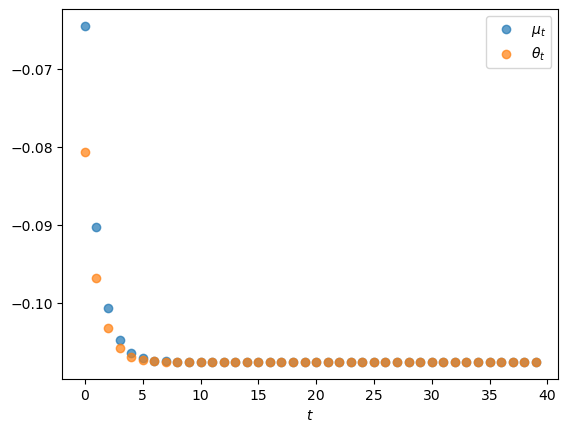

In [36]:
# Compute θ using optimized_μ
θs = np.array(compute_θ(optimized_μ))
μs = np.array(optimized_μ)

# Plot the two sequences
Ts = np.arange(T)

plt.scatter(Ts, μs, label=r'$\mu_t$', alpha=0.7)
plt.scatter(Ts, θs, label=r'$\theta_t$', alpha=0.7)
plt.xlabel(r'$t$')
plt.legend()
plt.show()

Note that while $\theta_t$  is less than $\mu_t$for low $t$'s, it eventually converges to
the  limit $\bar \mu$ of  $\mu_t$ as $t \rightarrow +\infty$.

This pattern reflects how formula {eq}`eq_grad_old3`  makes $\theta_t$ be a weighted average of future $\mu_t$'s.


## Continuation Values

For subsquent analysis, it will be useful to  compute a sequence $\{v_t\}_{t=0}^T$ of  what we'll call ``continuation values`` along a Ramsey plan.

To do so, we'll start at date $T$ and compute

$$
v_T = \frac{1}{1-\beta} s(\bar \mu, \bar \mu).
$$

Then starting from $t=T-1$, we'll iterate backwards on the recursion

$$
v_t = s(\theta_t, \mu_t) + \beta v_{t+1}
$$

for $t= T-1, T-2, \ldots, 0.$

In [37]:
# Define function for s and U in section 41.3
def s(θ, μ, u0, u1, u2, α, c):
    U = lambda x: u0 + u1 * x - (u2 / 2) * x**2
    return U(-α*θ) - (c / 2) * μ**2

# Calculate v_t sequence backward
def compute_vt(μ, β, c, u0=1, u1=0.5, u2=3, α=1):
    T = len(μs)
    θ = compute_θ(μ, α)
    
    v_t = np.zeros(T)
    μ_bar = μs[-1]
    
    # Reduce parameters
    s_p = lambda θ, μ: s(θ, μ, 
                       u0=u0, u1=u1, u2=u2, α=α, c=c)
    
    # Define v_T
    v_t[T-1] = (1 / (1 - β)) * s_p(μ_bar, μ_bar)
    
    # Backward iteration
    for t in reversed(range(T-1)):
        v_t[t] = s_p(θ[t], μ[t]) + β * v_t[t+1]
        
    return v_t

v_t = compute_vt(μs, β=0.85, c=2)

The initial continuation  value $v_0$ should equal the optimized value of the Ramsey planner's criterion $V$ defined
in equation {eq}`eq:RamseyV`.  


Indeed, we find that the deviation is very small:

In [38]:
print(f'deviation = {np.linalg.norm(v_t[0] - V_R)}')

deviation = 9.5367431640625e-07


We can also verify approximate equality  by inspecting a graph of $v_t$ against $t$ for $t=0, \ldots, T$ along with the value attained by a restricted Ramsey planner $V^{CR}$ and the optimized value of the ordinary Ramsey planner $V^R$

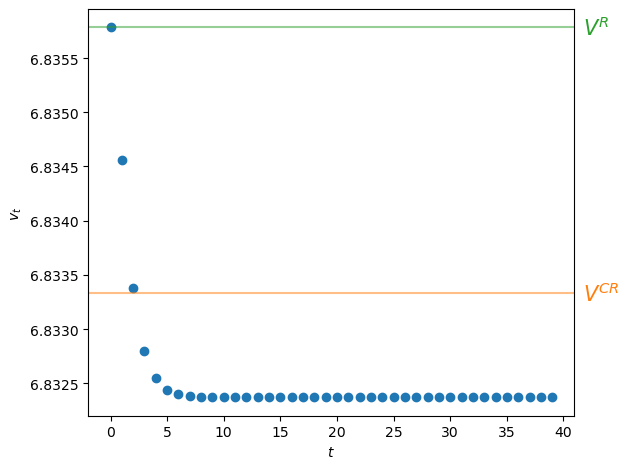

In [39]:
# Plot the scatter plot
plt.scatter(Ts, v_t, label='$v_t$')

# Plot horizontal lines
plt.axhline(V_CR, color='C1', alpha=0.5)
plt.axhline(V_R, color='C2', alpha=0.5)

# Add labels
plt.text(max(Ts) + max(Ts)*0.07, V_CR, '$V^{CR}$', color='C1', 
         va='center', clip_on=False, fontsize=15)
plt.text(max(Ts) + max(Ts)*0.07, V_R, '$V^R$', color='C2', 
         va='center', clip_on=False, fontsize=15)
plt.xlabel(r'$t$')
plt.ylabel(r'$v_t$')

plt.tight_layout()
plt.show()

Figure {numref}`continuation_values` shows  interesting patterns:

  * The sequence of continuation values $\{v_t\}_{t=0}^T$ is monotonically decreasing
  * Evidently,  $v_0 >  V^{CR} > v_T$ so that
      * the value $v_0$ of the ordinary Ramsey plan exceeds the value $V^{CR}$ of the special Ramsey plan in which the planner is constrained to set $\mu_t = \mu^{CR}$ for all $t$.
      * the continuation value $v_T$ of the ordinary Ramsey plan for $t \geq T$ is constant and is less than the value $V^{CR}$ of the special Ramsey plan in which the planner is constrained to set $\mu_t = \mu^{CR}$ for all $t$


```{note}
The continuation value $v_T$ is what some researchers call the "value of a Ramsey plan under a
time-less perspective." A more descriptive phrase is "the value of the worst continuation Ramsey plan."
```


## Adding Some Human Intelligence 

We have used our machine learning algorithms to compute a Ramsey plan.

By plotting it, we learned that the Ramsey planner makes  $\vec \mu$ and $\vec \theta$ both vary over time. 

 *  $\vec \theta$ and $\vec \mu$ both decline monotonically
 *  both of them converge from above to the same constant $\vec \mu$
  
Hidden from view, there  is a recursive structure in the $\vec \mu, \vec \theta$ chosen by the Ramsey planner that we want to bring out. 

To do so, we'll have to add some **human intelligence** to the **artificial intelligence** embodied in our machine learning approach. 

To proceed, we'll   compute  least squares linear regressions of some  components of $\vec \theta$ and $\vec \mu$ on others.

We hope that these regressions will reveal structure  hidden within the $\vec \mu^R, \vec \theta^R$ sequences associated with a Ramsey plan.

It is worth pausing  to think about  roles being  played here by  **human** intelligence and **artificial** intelligence.  

Artificial intelligence in the form of some Python code and  a computer  is running the regressions for us.

But we are free to  regress anything on anything else.

Human intelligence tells us what regressions to run. 

Additional inputs of  human intelligence will be  required fully to appreciate what those regressions  reveal about the structure of a Ramsey plan. 

```{note}
When we eventually get around to trying to understand the regressions below, it will  worthwhile to study  the reasoning that let  Chang {cite}`chang1998credible` to choose
$\theta_t$ as his key state variable. 
```


We begin by regressing $\mu_t$ on a constant and $\theta_t$. 

This might seem strange because, after all, equation {eq}`eq_grad_old3` asserts that inflation at time $t$  is determined $\{\mu_s\}_{s=t}^\infty$

Nevertheless, we'll run this regression anyway.

In [40]:
# First regression: μ_t on a constant and θ_t
X1_θ = sm.add_constant(θs)
model1 = sm.OLS(μs, X1_θ)
results1 = model1.fit()

# Print regression summary
print("Regression of μ_t on a constant and θ_t:")
print(results1.summary(slim=True))

Regression of μ_t on a constant and θ_t:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
No. Observations:                  40   F-statistic:                 1.733e+13
Covariance Type:            nonrobust   Prob (F-statistic):          3.88e-223
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0645   4.09e-08   1.58e+06      0.000       0.065       0.065
x1             1.5995   3.84e-07   4.16e+06      0.000       1.600       1.600

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


Our regression tells us that the affine function

$$
\mu_t = .0645 + 1.5995 \theta_t
$$

fits perfectly  along the Ramsey outcome $\vec \mu, \vec \theta$.


```{note}
Of course, this means that a regression of $\theta_t$ on $\mu_t$ and a constant would also fit perfectly. 
```

Let's plot the regression line $\mu_t = .0645 + 1.5995 \theta_t$  and the points $(\theta_t, \mu_t)$ that lie on it for $t=0, \ldots, T$.

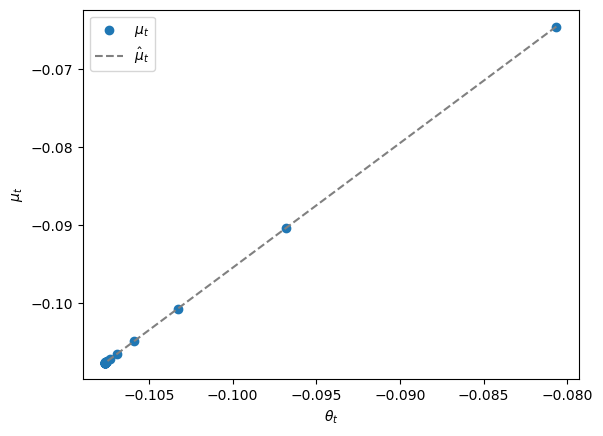

In [41]:
plt.scatter(θs, μs, label=r'$\mu_t$')
plt.plot(θs, results1.predict(X1_θ), 'grey', label=r'$\hat \mu_t$', linestyle='--')
plt.xlabel(r'$\theta_t$')
plt.ylabel(r'$\mu_t$')
plt.legend()
plt.show()

The  time $0$ pair  $(\theta_0, \mu_0)$ appears as the point on the upper right.  

Points $(\theta_t, \mu_t)$  for succeeding times appear further and further to the lower left and eventually converge to $(\bar \mu, \bar \mu)$.


Next, we'll run a linear regression of $\theta_{t+1}$ against $\theta_t$ and a constant.

In [42]:
# Second regression: θ_{t+1} on a constant and θ_t
θ_t = np.array(θs[:-1])  # θ_t
θ_t1 = np.array(θs[1:])  # θ_{t+1}
X2_θ = sm.add_constant(θ_t)  # Add a constant term for the intercept
model2 = sm.OLS(θ_t1, X2_θ)
results2 = model2.fit()

# Print regression summary
print("\nRegression of θ_{t+1} on a constant and θ_t:")
print(results2.summary(slim=True))


Regression of θ_{t+1} on a constant and θ_t:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
No. Observations:                  39   F-statistic:                 8.737e+11
Covariance Type:            nonrobust   Prob (F-statistic):          1.63e-193
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0645   4.56e-08  -1.41e+06      0.000      -0.065      -0.065
x1             0.4005   4.28e-07   9.35e+05      0.000       0.400       0.400

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


We find that the regression line fits perfectly and thus discover the affine relationship

$$
\theta_{t+1} = - .0645 + .4005 \theta_t 
$$

that prevails along the Ramsey outcome for inflation.

Let's plot $\theta_t$ for $t =0, 1, \ldots, T$ along the line.

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_181/154331351.py:2: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(θ_t, results2.predict(X2_θ), color='grey', label='$\hat θ_{t+1}$', linestyle='--')


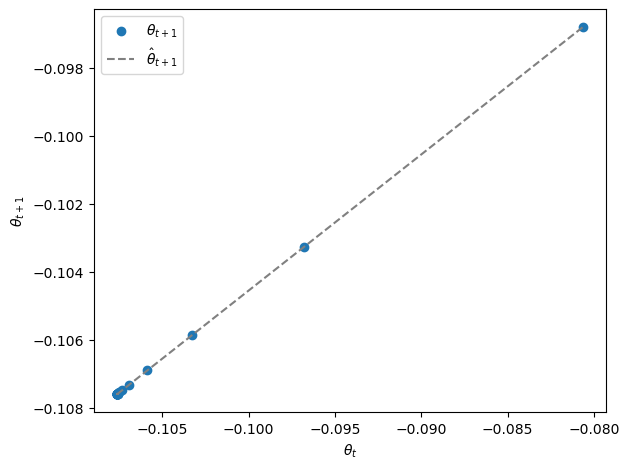

In [43]:
plt.scatter(θ_t, θ_t1, label=r'$\theta_{t+1}$')
plt.plot(θ_t, results2.predict(X2_θ), color='grey', label='$\hat θ_{t+1}$', linestyle='--')
plt.xlabel(r'$\theta_t$')
plt.ylabel(r'$\theta_{t+1}$')
plt.legend()

plt.tight_layout()
plt.show()

Points for succeeding times appear further and further to the lower left and eventually converge to
$\bar \mu, \bar \mu$.


Next we ask Python to  regress  continuation value $v_t$ against a constant, $\theta_t$, and $\theta_t^2$.  

$$
v_t = g_0 + g_1 \theta_t + g_2 \theta_t^2 . 
$$

In [44]:
# Third regression: v_t on a constant, θ_t and θ^2_t
X3_θ = np.column_stack((np.ones(T), θs, θs**2))
model3 = sm.OLS(v_t, X3_θ)
results3 = model3.fit()


# Print regression summary
print("\nRegression of v_t on a constant, θ_t and θ^2_t:")
print(results3.summary(slim=True))


Regression of v_t on a constant, θ_t and θ^2_t:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
No. Observations:                  40   F-statistic:                 5.519e+08
Covariance Type:            nonrobust   Prob (F-statistic):          5.23e-139
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8052   5.89e-06   1.16e+06      0.000       6.805       6.805
x1            -0.7581      0.000  -6053.760      0.000      -0.758      -0.758
x2            -4.6996      0.001  -7161.207      0.000      -4.701      -4.698

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indica

The regression has an $R^2$ equal to $1$ and so fits perfectly.

However, notice the warning about the high condition number. 

As indicated in the printout, this is a consequence of 
 $\theta_t$ and $\theta_t^2$ being  highly  correlated along the Ramsey plan.

In [45]:
np.corrcoef(θs, θs**2)

array([[ 1.        , -0.99942156],
       [-0.99942156,  1.        ]])

Let's  plot $v_t$ against $\theta_t$ along with the nonlinear regression line.

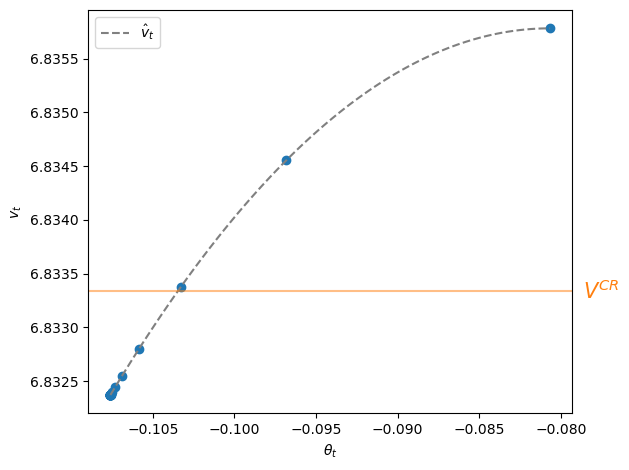

In [46]:
θ_grid = np.linspace(min(θs), max(θs), 100)
X3_grid = np.column_stack((np.ones(len(θ_grid)), θ_grid, θ_grid**2))

plt.scatter(θs, v_t)
plt.plot(θ_grid, results3.predict(X3_grid), color='grey', 
         label=r'$\hat v_t$', linestyle='--')
plt.axhline(V_CR, color='C1', alpha=0.5)

plt.text(max(θ_grid) - max(θ_grid)*0.025, V_CR, '$V^{CR}$', color='C1', 
         va='center', clip_on=False, fontsize=15)

plt.xlabel(r'$\theta_{t}$')
plt.ylabel(r'$v_t$')
plt.legend()

plt.tight_layout()
plt.show()

The highest continuation value $v_0$ at  $t=0$ appears at the peak of the function quadratic function
$g_0 + g_1 \theta_t + g_2 \theta_t^2$.


Subsequent values of $v_t$ for $t \geq 1$ appear to the lower left of the pair $(\theta_0, v_0)$ and converge  monotonically from above to $v_T$ at time $T$.

The value $V^{CR}$ attained by the Ramsey plan that is  restricted to be  a constant $\mu_t = \mu^{CR}$ sequence appears as a horizontal line.

Evidently, continuation values $v_t > V^{CR}$ for $t=0, 1, 2$ while $v_t < V^{CR}$ for $t \geq 3$. 


  




## What has Machine Learning Taught Us?


Our regressions tells us that along the Ramsey outcome $\vec \mu^R, \vec \theta^R$, the linear function

$$
\mu_t = .0645 + 1.5995 \theta_t
$$

fits perfectly and that so do the regression lines

$$
\theta_{t+1} = - .0645 + .4005 \theta_t 
$$

$$
v_t = 6.8052 - .7580 \theta_t - 4.6991 \theta_t^2. 
$$


Assembling these  regressions, we have discovered 
run for our single Ramsey outcome path $\vec \mu^R, \vec \theta^R$ 
that along a Ramsey plan, the following relationships prevail:



```{math}
:label: eq_old9101

\begin{aligned}
\theta_0 & = \theta_0^R \\
\mu_t &  = b_0 + b_1 \theta_t \\
\theta_{t+1} & = d_0 + d_1 \theta_t  \\
\end{aligned}
```

where the initial value $\theta_0^R$ was computed along with other components of $\vec \mu^R, \vec \theta^R$ when we computed the Ramsey plan, and where $b_0, b_1, d_0, d_1$ are  parameters whose values we estimated with our regressions.

In addition, we learned that  continuation values are described by the quadratic function

$$
v_t = g_0 + g_1 \theta_t + g_2 \theta_t^2
$$


We  discovered these relationships  by running some carefully chosen  regressions and staring at the results, noticing that the $R^2$'s of unity tell us that the fits are perfect. 

We have learned much  about the structure of the Ramsey problem.

However, by using the methods and ideas that we have deployed in this lecture, it is challenging to say more.  

There are many other linear regressions among components of $\vec \mu^R, \theta^R$ that would also have given us perfect fits.

For example, we could have regressed $\theta_t$ on $\mu_t$ and obtained the same $R^2$ value.  

Actually, wouldn't that  direction of fit have made  more sense? 

After all, the Ramsey planner  chooses $\vec \mu$,  while $\vec \theta$ is an  outcome that reflects the represenative agent's response to the Ramsey planner's  choice of $\vec \mu$.

Isn't it more natural then to expect that we'd learn more about the structure of the Ramsey  problem from a regression of components of $\vec \theta$ on components of $\vec \mu$?

To answer these  questions, we'll have to  deploy more economic theory.

We do that in this quantecon lecture {doc}`calvo`.

There, we'll discover that system {eq}`eq_old9101` is actually a very good way to represent 
a Ramsey plan because it reveals many things about its structure.

Indeed, in that lecture, we show how to compute the Ramsey plan using **dynamic programming squared** and provide a Python class ``ChangLQ`` that performs the calculations.

We have deployed ``ChangLQ`` earlier in this lecture to compute a baseline Ramsey plan to which we have compared outcomes from our application of the cruder machine learning approaches studied here. 

Let's use the code to compute the parameters $d_0, d_1$ for the decision rule for $\mu_t$
and the parameters $d_0, d_1$ in the updating rule for $\theta_{t+1}$ in representation
{eq}`eq_old9101`.

First, we'll again use ``ChangLQ`` to compute these objects (along with a number of others).

In [47]:
clq = ChangLQ(β=0.85, c=2, T=T)

Now let's print out the decision rule for $\mu_t$ uncovered by applying dynamic programming squared.

In [48]:
print("decision rule for μ")
print(f'-(b_0, b_1) = ({-clq.b0:.6f}, {-clq.b1:.6f})')

decision rule for μ
-(b_0, b_1) = (0.064507, 1.599536)


Now let's print out the decision rule for $\theta_{t+1} $ uncovered by applying dynamic programming squared.

In [49]:
print("decision rule for θ(t+1) as function of θ(t)")
print(f'(d_0, d_1) =  ({clq.d0:.6f}, {clq.d1:.6f})')

decision rule for θ(t+1) as function of θ(t)
(d_0, d_1) =  (-0.064507, 0.400464)


Evidently, these agree with the relationships that we discovered by running regressions on the Ramsey outcomes $\vec \mu^R, \vec \theta^R$ that we constructed with either of our machine learning algorithms.

We have set the stage for this quantecon lecture {doc}`calvo`.

We close this lecture by giving a hint about an insight of Chang {cite}`chang1998credible` that 
underlies much of quantecon lecture {doc}`calvo`.

Chang noticed how equation {eq}`eq_grad_old3` shows that an equivalence class of continuation money growth sequences $\{\mu_{t+j}\}_{j=0}^\infty$ deliver the same $\theta_t$.

Consequently, equations {eq}`eq_grad_old1` and {eq}`eq_grad_old3` indicate that $\theta_t$ intermediates how the government's choices of $\mu_{t+j}, \ j=0, 1, \ldots$ impinge on time $t$
real balances $m_t - p_t = -\alpha \theta_t$.  

In lecture {doc}`calvo`, we'll see how  Chang {cite}`chang1998credible` put  this
insight to work.